In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 개요
- PCA는 현재의 기저보다 데이터를 잘 데이터를 잘 표현할 수 있는 새로운 직교 기저를 찾고 해당 기저들로 Projection 하여 저차원 Hyper Plane으로 데이터를 표현하는 방법이다.
- Projection 시킬 기저는 다음 2가지 조건을 만족시켜야한다.
    1. 각 기저에 Projection 시켰을 때 분산이 최대가 되어야한다.<br>
        - 그래야지만 저차원 Hyper Plane으로 Projection 시켰을 때 손실되는 정보량을 최소화하며 저차원, 독립적으로 데이터를 표현할 수 있다.
    2. 표준 기저여야한다.<br>
        - 그래야지 데이터를 해당 기저로 Projection 했을 때 새로운 기저에 대한 주소(좌표)를 쉽게 파악할 수 있고, 분산이 무한대로 발산하는 것을 방지할 수 있다.

### 2. 에 대해서 조금 더 살펴보자.

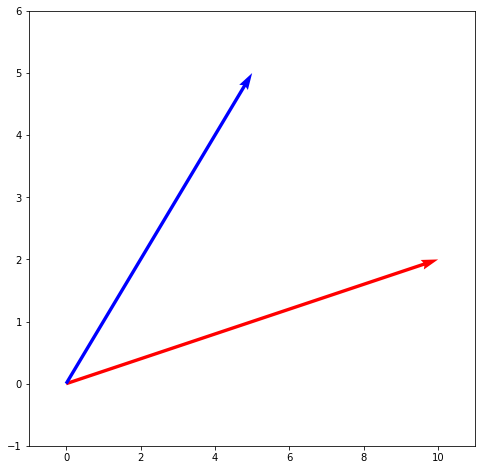

In [17]:
plt.figure(figsize=(8,8))
plt.quiver([0, 0], [0, 0], [10, 5], [2, 5], angles='xy', scale_units='xy', scale=1, color = ['r','b'])
plt.xlim(-1, 11)
plt.ylim(-1, 6)
plt.show()

위의 벡터들은 e1 = (1,0), e2 = (0,1) 기저 상에서 v = (10,2), u = (5,5)란 좌표값을 갖는다. 그런데 파란색 벡터를 빨간색 벡터로 Projection 시킨 후 표현하면 어떻게 될까? 먼저 해당 벡터로 projection 시켜보기 위해서 $\alpha\vec{v}$ 는 $\vec{u}$를 $\vec{v}$로 projection 한 벡터라 가정해보자. 그렇다면 다음과 같이 표현할 수 있다.

- $\vec{v}^T\cdot$($\vec{u}$ - $\alpha\vec{v}$) = 0
- $\vec{v}^T\cdot\vec{u}$ - $\alpha\vec{v}^T\vec{v}$ = 0
- $\alpha$ = $\vec{v}^T\cdot\vec{u}$ / $\vec{v}^T\vec{v}$

따라서 $\alpha$ 는 60 / 104 이다. 이를 표현해보자.

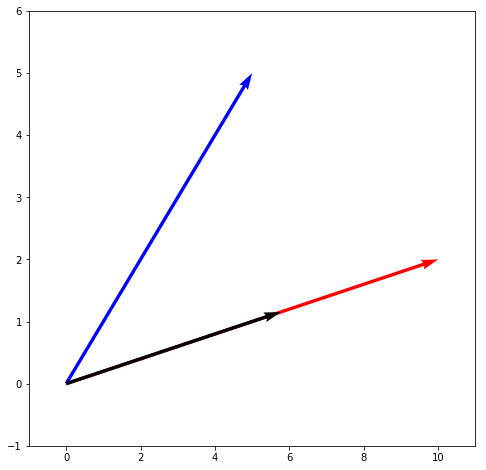

In [18]:
alpha = 60/104
plt.figure(figsize=(8,8))
plt.quiver([0, 0, 0],
           [0, 0, 0],
           [10, 5, 10 * alpha],
           [2, 5, 2 * alpha],
           angles='xy', scale_units='xy', scale=1, color = ['r','b', 'Black'])
plt.xlim(-1, 11)
plt.ylim(-1, 6)
plt.show()

- 직교가 되는가? 된다. 다만, $\vec{u}$와 $\vec{v}$의 내적으로만 되는 것이 아니라 projection 대상인 $\vec{v}$의 내적 값 또한 스케일링 스칼라로 필요하다. 그런데 $\vec{v}$가 유닛 벡터라면 $\vec{v}$의 내적값은 1이 되고 분모가 1이 된다면 별도의 스케일링 스칼라를 구할 필요가 없이 내적만으로 우리는 값을 알 수 있다.
- 그렇기에 PCA에서 기저를 unit vector라고 가정을 하는 것이다. 또한, 어떤 식으로라도 제한하지 않으면 무조건 기저 벡터의 크기가 커질수록(norm) 분산이 최대화 되기 때문에 의미가 없다.
- 따라서 PCA에서는 우리가 projection 하는 기저는 유닛 벡터여야 하고 분산을 최대화하는 것과 동시에 해당 조건을 만족시켜야 한다는 것을 인지하자.
- $\vec{v}^T\cdot\vec{v}$ = 1 $\rightarrow$ 제한조건
- 그렇다면 projection 시켰을 때 분산을 최대화 하는 기저는 어떻게 찾을 것인가? 직접 계산하면 된다.
    - $\vec{z} = X\vec{v}$
    - $X\vec{v} \in R^n\times 1$
    
    - $M\underset{v}AX(VAR(\vec{z}))$ = $M\underset{v}AX(VAR(\vec{v}^TX))$
    - 이때 $VAR(\vec{v}^TX))$ 은 $X$에 대한 식이다.
    - $VAR(\vec{v}^TX))$ = $\vec{a}^T\Sigma\vec{a}$
    - $\vec{a}^T\Sigma\vec{a}$ 는 스칼라이다.
    - 따라서 $M\underset{v}AX(VAR(\vec{z}))$ = $M\underset{v}AX(\vec{a}^T\Sigma\vec{a})$ 단 제한조건 $\vec{v}^T\cdot\vec{v}$ = 1 하에서...
    - 그렇기에 제한조건이 있는 최대화 문제로 생각할 수 있고 라그랑지언 승수법으로 값을 구할 수 있다.
    - $L = \vec{a}^T\Sigma\vec{a}$ - $\lambda(\vec{v}^T\cdot\vec{v} - 1)$
    - $\frac{\partial L}{\partial \vec{a}}$ = $2  \Sigma\vec{a} - 2  \lambda\vec{a}$
    - $2  \Sigma\vec{a} - 2  \lambda\vec{a}$ = 0 $\rightarrow$ $\Sigma\vec{a} - \lambda\vec{a}$ = 0
    - $\Sigma\vec{a} = \lambda\vec{a}$
    - 따라서 분산을 최대화 하는 기저 $\vec{a}$ 는 원시 데이터를 centering한 $X$ 의 eigen vector라는 것을 알 수 있다.
    - 한편 $\Sigma$는 대칭행렬이므로 이는 반드시 eigen decomposition 이 가능하고, eigen vector 들은 직교하고, eigen value가 같아도 eigen vector는 달라진다. 즉, 항상 가능하고 기저들은 정규직교 기저이다.
    - 이렇게 나온 eigen vector는 유닛벡터이고, 이를 주성분이라 한다.